In [19]:
import os
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Synthetic data generation

In [21]:
import warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed")

In [22]:
import pandas as pd

## Load transactions

In [23]:
data = pd.read_csv('data/james.csv')
data.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


## Prepare dataset

In [24]:
data = data.dropna()

In [25]:
data['SeriousDlqin2yrs'] = data['SeriousDlqin2yrs'].astype(dtype='category')

In [26]:
data = data.drop('Unnamed: 0', axis=1)

In [27]:
data.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

## Train model and synthesized data

In [30]:
from synthesized.core import BasicSynthesizer

In [31]:
with BasicSynthesizer(data=data, embedding_size=32, iterations=20000) as synthesizer:
    synthesizer.learn(data=train, verbose=1000)
    synthesized = synthesizer.synthesize(n=100000)

value types:
SeriousDlqin2yrs categorical
RevolvingUtilizationOfUnsecuredLines continuous
age categorical-similarity
NumberOfTime30-59DaysPastDueNotWorse categorical-similarity
DebtRatio continuous
MonthlyIncome continuous
NumberOfOpenCreditLinesAndLoans categorical-similarity
NumberOfTimes90DaysLate categorical-similarity
NumberRealEstateLoansOrLines categorical-similarity
NumberOfTime60-89DaysPastDueNotWorse categorical-similarity
NumberOfDependents categorical-similarity
1000: 5.30e+03
2000: 2.53e+03
3000: 2.69e+02
4000: 1.44e+02
5000: 7.20e+01
6000: 9.34e+01
7000: 1.43e+02
8000: 5.03e+01
9000: 5.27e+01
10000: 5.78e+01
11000: 1.44e+02
12000: 9.83e+01
13000: 4.40e+01
14000: 6.05e+01
15000: 3.53e+01
16000: 3.02e+01
17000: 3.15e+01
18000: 4.92e+01
19000: 1.11e+02
20000: 2.73e+01


## Display synthesized data

In [33]:
synthesized.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.048594,61,0,7.588031,96.787689,7,0,1,0,0.0
1,0,0.466066,43,0,8.743803,36.780369,1,0,0,0,0.0
2,0,0.000000,73,0,0.060197,97.354172,4,0,0,0,0.0


# Visualization of original and synthetic data

In [34]:
from synthesized.testing import UtilityTesting, ColumnType
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [35]:
testing = UtilityTesting(synthesizer, train, test, synthesized)

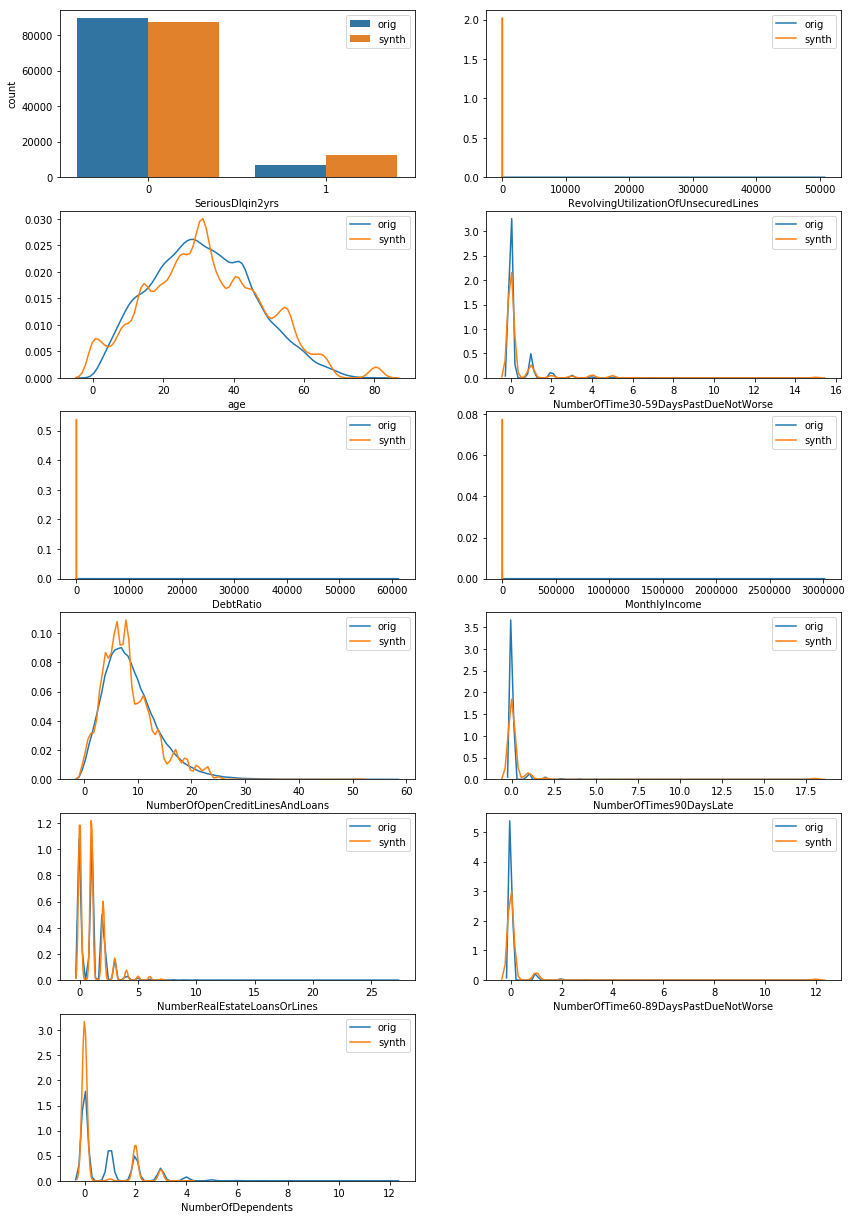

In [36]:
testing.show_distributions()

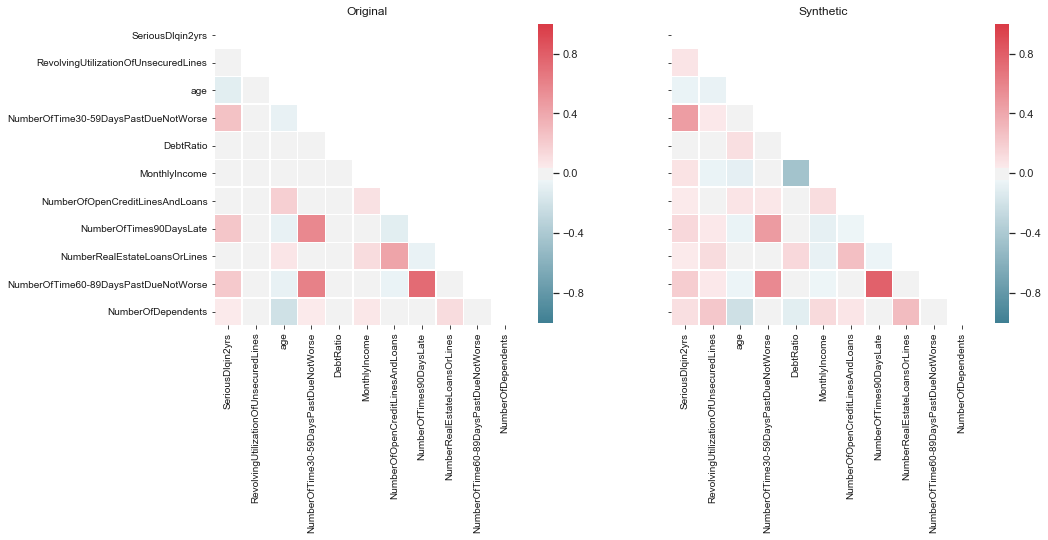

In [37]:
testing.show_corr_matrices()

# Tests to confirm the utility of synthetic data

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
testing.utility(target='SeriousDlqin2yrs', classifier=GradientBoostingClassifier())

ROC AUC (orig): 0.8578291876498827
ROC AUC (synth): 0.8188114855191627


# Tests to confirm the security of original data 

In [44]:
from synthesized.testing import LinkageAttackTesting, Column

## Focus on a small chunk of original data for demo purposes

In [45]:
data_orig_reduced = data.head(30000)

In [50]:
data_orig_reduced.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


## Define schema for security checks

Each attribute in a dataset has the following properties to be specified by the user
1. "key_attribute" - whether the attribute can be available to the attacker as background knowledge 
2. "sensitive" - whether the attribute is SPI 
3. "categorical" - wtether the attribute is a categorical variable

In [51]:
data.dtypes

SeriousDlqin2yrs                        category
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
dtype: object

In [52]:
schema = {
    'age': Column(key_attribute=True, sensitive=True, categorical=False),
    'MonthlyIncome': Column(key_attribute=True, sensitive=True, categorical=False),
    'NumberOfDependents': Column(key_attribute=True, sensitive=True, categorical=False),
    'DebtRatio': Column(key_attribute=False, sensitive=True, categorical=False),
}

## Identify and demonstrate vulnerabilities in synthetic data

In [103]:
linkage = LinkageAttackTesting(data_orig_reduced, synthesized, schema)

In [104]:
attacks = linkage.identify_attacks()

In [105]:
len(attacks)

6

In [106]:
linkage.show_attacked_data(attacks[1])

attribute under attack:  NumberOfDependents

background knowledge:  ['MonthlyIncome', 'age']


 original df subset: 
      MonthlyIncome  age  NumberOfDependents
44             1.0   68                 0.0
113        10000.0   68                 1.0
119         8168.0   68                 0.0
243         6000.0   68                 0.0
269         3600.0   68                 0.0


 synthetic df subset: 
      MonthlyIncome  age  NumberOfDependents
92       47.833118   68                 0.0
100      70.571091   68                 0.0
190      73.435989   59                 0.0
195     100.867401   68                 0.0
222      36.581783   68                 0.0


## Clear the synthetic dataset from vulnerabilities

In [107]:
cleared_df = linkage.eradicate_attacks(attacks)

remaining attacks :  6


## Demonstrate the security of synthetic data

In [111]:
from synthesized.testing.linkage_attack import identify_attacks

In [112]:
new_attacks = identify_attacks(data_orig_reduced, cleared_df, schema)

In [113]:
len(new_attacks)

0

## Demonstrate the utility of synthetic data cleared from all vulnerabilities

In [114]:
testing = UtilityTesting(synthesizer, data, test, cleared_df)

In [115]:
testing.utility(target='SeriousDlqin2yrs', classifier=GradientBoostingClassifier())

ROC AUC (orig): 0.8635954232336037
ROC AUC (synth): 0.8142569412842864


## Demonstrate the synthetic dataset to be released to the user

In [118]:
synthesized.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.048594,61,0,7.588031,96.787689,7,0,1,0,0.0
1,0,0.466066,43,0,8.743803,36.780369,1,0,0,0,0.0
2,0,0.000000,73,0,0.060197,97.354172,4,0,0,0,0.0
3,0,0.001595,51,0,0.168018,93.513603,13,0,1,0,0.0
4,1,1.082421,36,1,4.268211,90.321854,6,1,1,1,2.0
